# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [2]:
filename="/home/diegom04/DATA3402.Clone/DATA3402.Spring.2025/Labs/Lab.7/SUSY-small.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [3]:
!python3 -m pip show scikit-learn  # show scikit-learn version and location
!python3 -m pip freeze             # show all installed packages in the environment
!python3 -c "import sklearn; sklearn.show_versions()"

Name: scikit-learn
Version: 1.4.1.post1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/lib/python3/dist-packages
Requires: 
Required-by: 
appdirs==1.4.4
argon2-cffi==21.1.0
asttokens==2.4.1
attrs==23.2.0
Automat==22.10.0
Babel==2.10.3
bcrypt==3.2.2
beautifulsoup4==4.12.3
bleach==6.1.0
blinker==1.7.0
Bottleneck==1.3.5
Brotli==1.1.0
bytecode==0.15.1
certifi==2023.11.17
chardet==5.2.0
click==8.1.6
cloud-init==24.4
colorama==0.4.6
comm==0.2.1
command-not-found==0.3
configobj==5.0.8
constantly==23.10.4
contourpy==1.0.7
coverage==7.4.4
cryptography==41.0.7
cssselect==1.2.0
cycler==0.11.0
dbus-python==1.3.2
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
distro==1.9.0
distro-info==1.7+build1
entrypoints==0.4
et-xmlfile==1.0.1
executing==2.0.1
fastjsonschema==2.19.0
fonttools==4.46.0
fs==2.4.16
html5lib==1.1
httplib2==0.20.4
hyperlink==21.0.0
idna==3.6
incremental==22.10.0
inico

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [3]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [4]:
# I had to use the smaller SUSY datset because Jupyter Notebook kept crashing when I tried the original size.
# I adjusted the number of events based on the new amount of rows to maintain the same ratio.

N_Train=400000  

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

We can train the classifier as follow:

In [5]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

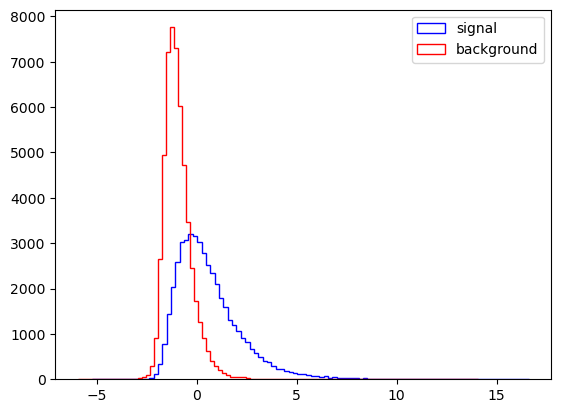

In [6]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

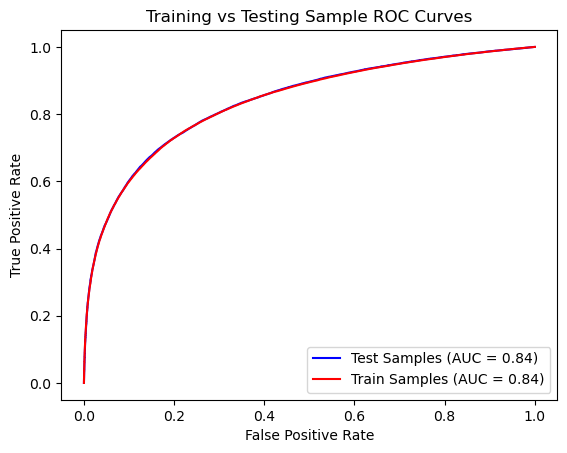

In [19]:
from sklearn.metrics import roc_curve, auc

# There doesn't seem to be any bias
fpr_test, tpr_test, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))
fpr_train, tpr_train, _ = roc_curve(y_Train, Fisher.decision_function(X_Train))

roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)

plt.plot(fpr_test, tpr_test, color = "blue", label = 'Test Samples (AUC = %0.2f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color = "red", label = 'Train Samples (AUC = %0.2f)' % roc_auc_train)
plt.legend(loc="lower right") 
plt.title("Training vs Testing Sample ROC Curves")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

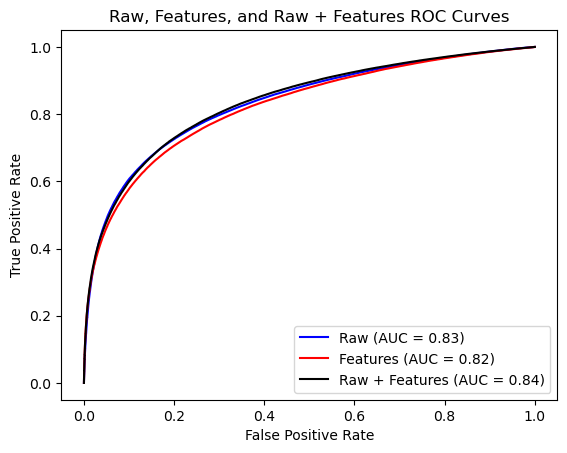

In [20]:
Raw_Features = ["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Raw = ["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]

Features = list(set(Raw_Features[1:]).difference(Raw))

X_Raw = df[Raw]
X_Features = df[Features]
X_All = df[Raw_Features[1:]]
y = df["signal"]

fisher_raw = DA.LinearDiscriminantAnalysis().fit(X_Raw, y)
fisher_features = DA.LinearDiscriminantAnalysis().fit(X_Features, y)
fisher_all = DA.LinearDiscriminantAnalysis().fit(X_All, y)

fpr_raw, tpr_raw, _ = roc_curve(y, fisher_raw.decision_function(X_Raw))
fpr_features, tpr_features, _ = roc_curve(y, fisher_features.decision_function(X_Features))
fpr_all, tpr_all, _ = roc_curve(y, fisher_all.decision_function(X_All))

roc_auc_raw = auc(fpr_raw, tpr_raw)
roc_auc_features = auc(fpr_features, tpr_features)
roc_auc_all = auc(fpr_all, tpr_all)

plt.plot(fpr_raw, tpr_raw, color = "blue", label = 'Raw (AUC = %0.2f)' % roc_auc_raw)
plt.plot(fpr_features, tpr_features, color = "red", label = 'Features (AUC = %0.2f)' % roc_auc_features)
plt.plot(fpr_all, tpr_all, color = "black", label = 'Raw + Features (AUC = %0.2f)' % roc_auc_all)
plt.legend(loc="lower right") 
plt.title("Raw, Features, and Raw + Features ROC Curves")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 7.

In [21]:
# Exercise 4a.

# Logistic Regression - Excels at predicting binary outputs
# K Nearest Neighbors - Simple model and good to get a baseline for a dataset
# Random Forest - Shown to be one of the best ML models for classification

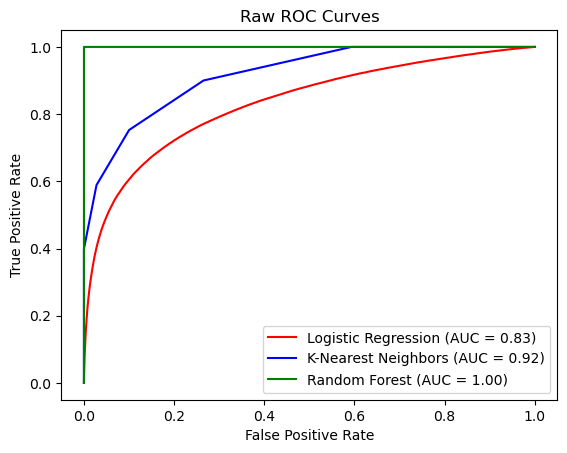

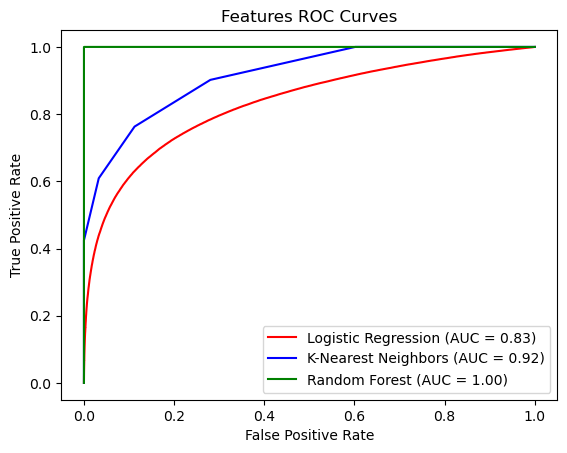

In [ ]:
#Exercise 4b. 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

def ROC_Comparison(classifier, x, y):
    classifier.fit(x, y)
    fpr, tpr, _ = roc_curve(y, classifier.predict_proba(x)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc

# Given the models some common baseline hyperparameters
classifiers = {
    "Logistic Regression": lambda: LogisticRegression(max_iter = 100),
    "K-Nearest Neighbors": lambda: KNeighborsClassifier(n_neighbors = 5),
    "Random Forest": lambda: RandomForestClassifier(n_estimators = 100, random_state = 42)}

X_sets = {"Raw": X_Raw, "Features": X_Features, "Raw + Features": X_All}
colors = ["red", "blue", "green"]

for feature_name, X in X_sets.items():
    plt.figure()
    
    for (model_name, model_init), color in zip(classifiers.items(), colors):
        model = model_init()
        fpr, tpr, roc_auc = ROC_Comparison(model, X, y)
        plt.plot(fpr, tpr, color = color, label=f"{model_name} (AUC = %0.2f)" % roc_auc)

    plt.legend(loc="lower right") 
    plt.title(f"{feature_name} ROC Curves")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
# The third plot could't be printed. Even after waiting for a long time it never printed the plot. 

In [9]:
# Exercise 4c. 
# Random Forest performed the best

from sklearn.ensemble import RandomForestClassifier
import numpy as np

scenarios = {"Scenario 1": (10, 100), "Scenario 2": (100, 1000), 
             "Scenario 3": (1000, 10000), "Scenario 4": (10000, 100000)}

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_Train, y_Train)

p = rf.predict_proba(X_Test)[:, 1]
y_pred = (p > 0.5).astype(int)

sig = y_Test == 1
bkg = y_Test == 0
TPR = ((y_pred == 1) & sig).sum() / sig.sum()
FPR = ((y_pred == 1) & bkg).sum() / bkg.sum()

def calculate_sig(n_sig, n_bkg):
    return n_sig / np.sqrt(n_sig + n_bkg)

for scenario, (n_sig, n_bkg) in scenarios.items():
    sig_pred = TPR * n_sig
    bkg_pred = FPR * n_bkg
    significance = calculate_sig(sig_pred, bkg_pred)
    
    print(f"{scenario}: Significance = {significance}")

Scenario 1: Significance = 1.5941751958074923
Scenario 2: Significance = 5.041224608096584
Scenario 3: Significance = 15.941751958074923
Scenario 4: Significance = 50.41224608096586


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

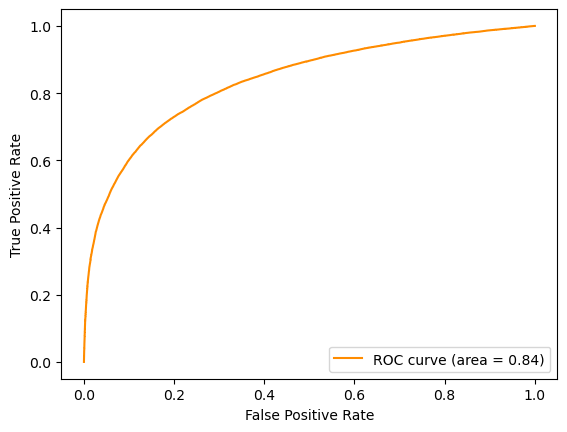

In [10]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

table = []

for name, (n_sig, n_bkg) in scenarios.items():
    rf.fit(X_Train, y_Train)
    y_pred = rf.predict(X_Test)
    y_prob = rf.predict_proba(X_Test)[:, 1]  

    sig = y_Test == 1
    bkg = y_Test == 0
    TPR = ((y_pred == 1) & sig).sum() / sig.sum()
    FPR = ((y_pred == 1) & bkg).sum() / bkg.sum()

    fpr_vals, tpr_vals, _ = roc_curve(y_Test, y_prob)
    roc_auc = auc(fpr_vals, tpr_vals)
    precision = precision_score(y_Test, y_pred)
    recall = recall_score(y_Test, y_pred)
    f1 = f1_score(y_Test, y_pred)
    accuracy = accuracy_score(y_Test, y_pred)

    sig_pred = TPR * n_sig
    bkg_pred = FPR * n_bkg
    significance = calculate_sig(sig_pred, bkg_pred)

    table.append([name, TPR, FPR, roc_auc, precision, recall, f1, accuracy, significance])


display(HTML(tabulate.tabulate(table, headers = ["Scenario", "TPR", "FPR", "ROC_AUC", "Precision", 
           "Recall", "F1", "Accuracy", "Maximum Significance"], tablefmt='html')))

Scenario,TPR,FPR,ROC_AUC,Precision,Recall,F1,Accuracy,Maximum Significance
Scenario 1,0.711634,0.128106,0.868442,0.825305,0.711634,0.764266,0.79824,1.59418
Scenario 2,0.711634,0.128106,0.868442,0.825305,0.711634,0.764266,0.79824,5.04122
Scenario 3,0.711634,0.128106,0.868442,0.825305,0.711634,0.764266,0.79824,15.9418
Scenario 4,0.711634,0.128106,0.868442,0.825305,0.711634,0.764266,0.79824,50.4122
